#<b>Проект: Исследование объема продаж видеоигр.</b>


##<b>Описание проекта</b>
Провести анализ исключительно данных о продажах видеоигр, собранных с различных источников, для выявления ключевых трендов и структуры мирового рынка видеоигр.

Набор данных содержит список видеоигр с объемом продаж более 100 000 копий.<br>
Всего насчитывается 16 598 записей. 2 записи были удалены из-за неполной информации.

##<b>Описание данных</b>

- <b>Rank</b> - рейтинг общих продаж;
- <b>Name</b> - наименование игры;
- <b>Platform</b> - игровая платформа(PC, PS4, и т. д);
- <b>Year</b> - год релиза;
- <b>Genre</b> - жанр;
- <b>Publisher</b> - издатель;
- <b>NA_Sales</b> - продажи в Северной Америке (в миллионах);
- <b>EU_Sales</b> - продажи в Европе (в миллионах);
- <b>JP_Sales</b> - продажи в Японии (в миллионах);
- <b>Other_Sales</b> - продажи в остальном мире (в миллионах);
- <b>Global_Sales</b> - общий объем продаж по всему миру.

##<b>Задачи исследования</b>

<b>Предобработка данных</b>
- Приведем наименовая столбцов в корректному виду.
- Проверим пропуски и типы данных. Откорректируем, если это потребуется.
- Проверим данные на дубликаты.

<b>Исследовательский анализ данных</b>

- Распределение продаж по игровым платформам.
- Распрееделение продаж по годам (топ 10).
- Распределение игровых жанров.
- Распределение продаж по издателям (топ 15).
- Топ-10 популярных игр по регионам.
- Самые продаваемые игровые платформы по регионам.
- Популярность игровых жанров по регионам.
- Уровень продаж по всем регионам

<b>Общий вывод</b>

In [1]:
!gdown --id 1pw5u0qFpA9QQExsb7gXJLwccDLEx5Tah

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pw5u0qFpA9QQExsb7gXJLwccDLEx5Tah
To: /content/vgsales.csv
100% 1.36M/1.36M [00:00<00:00, 62.5MB/s]


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('vgsales.csv')

In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## <b>Предобработка данных</b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.columns = df.columns.str.lower()

In [7]:
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

In [8]:
df.isna().sum()

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [9]:
df['year'] = df['year'].fillna(0)

In [10]:
df['publisher'] = df['publisher'].fillna('unknown')

In [11]:
df['year'] = df['year'].astype(int)

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,1973.647307,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,254.346809,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## <b> Исследовательский анализ данных </b>

In [14]:
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###Распредление продаж по игровым платформам

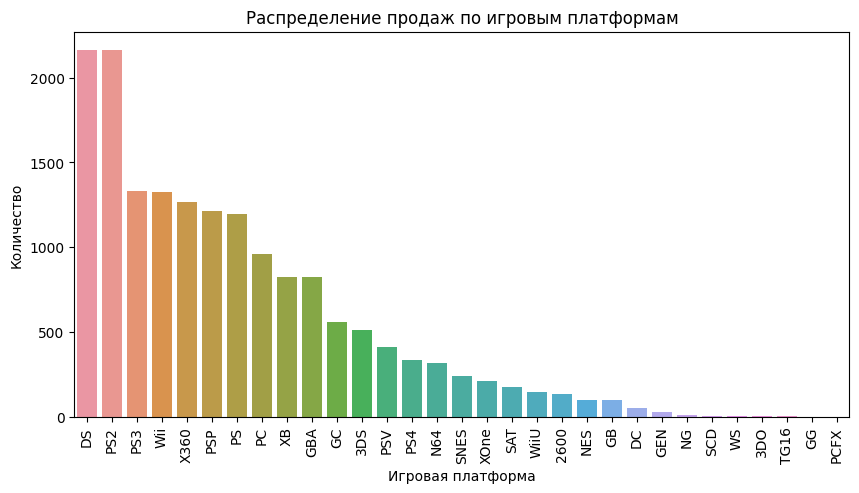

In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Игровая платформа')
plt.ylabel('Количество')
plt.title('Распределение продаж по игровым платформам')
plt.show()

In [16]:
df['platform'].value_counts() / len(df['platform']) * 100

DS      13.031691
PS2     13.019641
PS3      8.006989
Wii      7.982890
X360     7.621400
PSP      7.308109
PS       7.205687
PC       5.783829
XB       4.964454
GBA      4.952404
GC       3.349801
3DS      3.066635
PSV      2.488252
PS4      2.024340
N64      1.921918
SNES     1.439933
XOne     1.283287
SAT      1.042294
WiiU     0.861550
2600     0.801301
NES      0.590433
GB       0.590433
DC       0.313291
GEN      0.162670
NG       0.072298
SCD      0.036149
WS       0.036149
3DO      0.018074
TG16     0.012050
GG       0.006025
PCFX     0.006025
Name: platform, dtype: float64

###Распределение продаж по годам (топ 10)

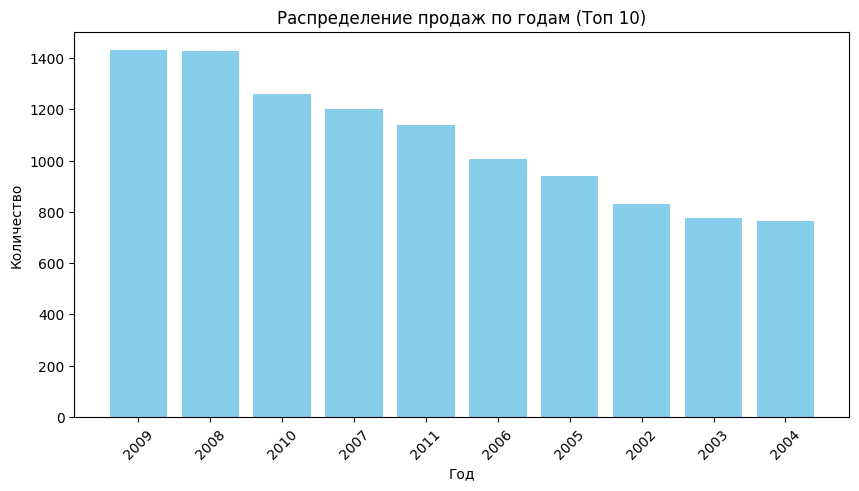

In [17]:
top_10_years = df['year'].value_counts().head(10)
plt.figure(figsize=(10, 5))
plt.bar(top_10_years.index.astype(str), top_10_years.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Год')
plt.ylabel('Количество')
plt.title('Распределение продаж по годам (Топ 10)')
plt.show()

In [18]:
top_10_years / len(df['year']) * 100

2009    8.621521
2008    8.603446
2010    7.585251
2007    7.241836
2011    6.862273
2006    6.073021
2005    5.669358
2002    4.994578
2003    4.669237
2004    4.596939
Name: year, dtype: float64

###Доли игровых жанров

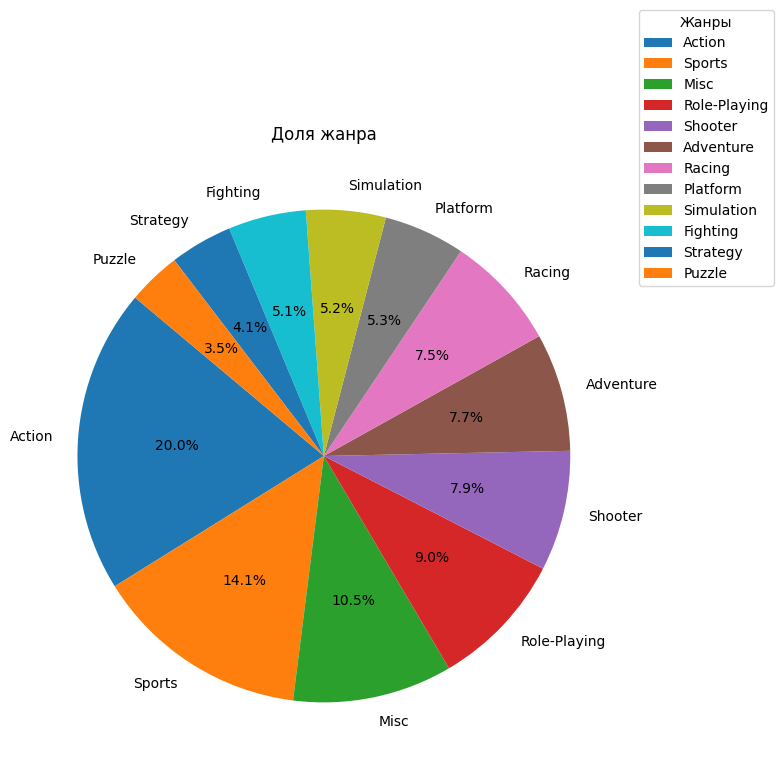

In [19]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.legend(genre_counts.index, title='Жанры', loc='center left', bbox_to_anchor=(1, 1))
plt.title('Доля жанра')
plt.show()

###Распределение продаж по издателям (топ 15)

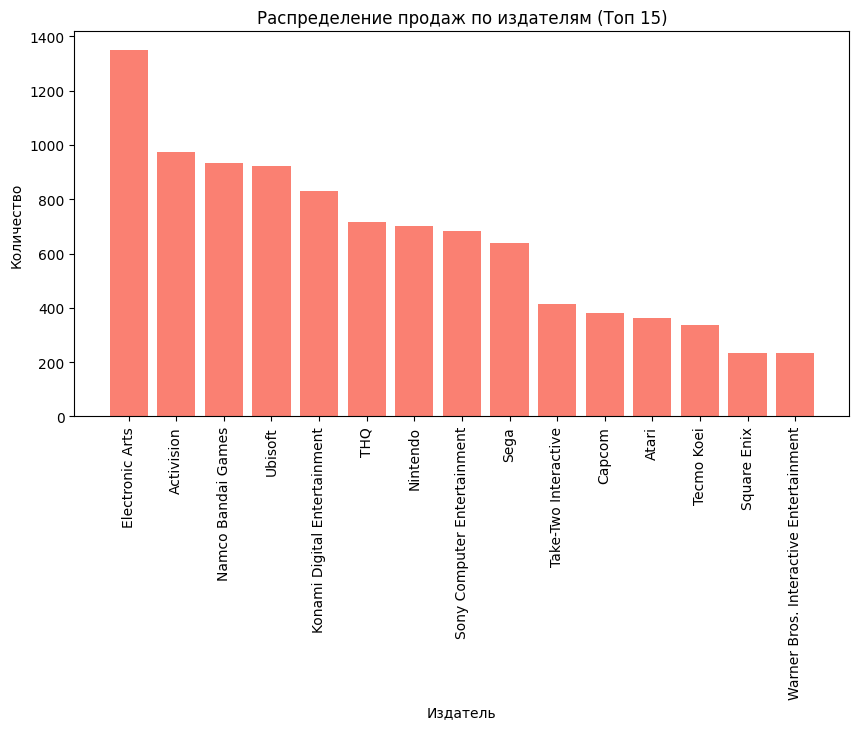

In [20]:
top_15_publishers = df['publisher'].value_counts().head(15)
plt.figure(figsize=(10, 5))
plt.bar(top_15_publishers.index, top_15_publishers.values, color='salmon')
plt.xticks(rotation=90)
plt.xlabel('Издатель')
plt.ylabel('Количество')
plt.title('Распределение продаж по издателям (Топ 15)')
plt.show()

In [21]:
top_15_publishers / len(df['publisher']) * 100

Electronic Arts                           8.139535
Activision                                5.874202
Namco Bandai Games                        5.615134
Ubisoft                                   5.548861
Konami Digital Entertainment              5.012652
THQ                                       4.307748
Nintendo                                  4.235450
Sony Computer Entertainment               4.114954
Sega                                      3.849861
Take-Two Interactive                      2.488252
Capcom                                    2.295457
Atari                                     2.187010
Tecmo Koei                                2.036390
Square Enix                               1.403784
Warner Bros. Interactive Entertainment    1.397759
Name: publisher, dtype: float64

###Топ-10 популярных игр по регионам

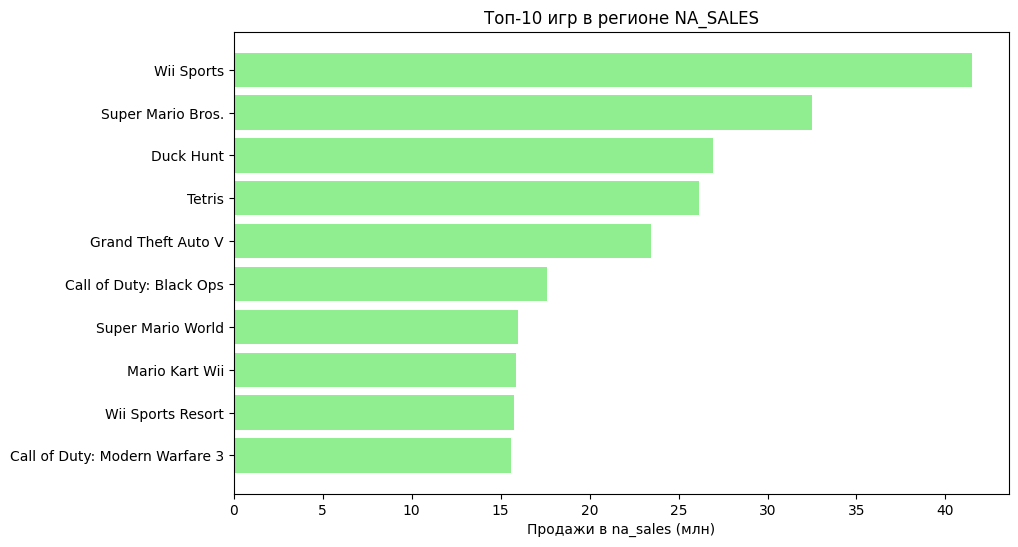

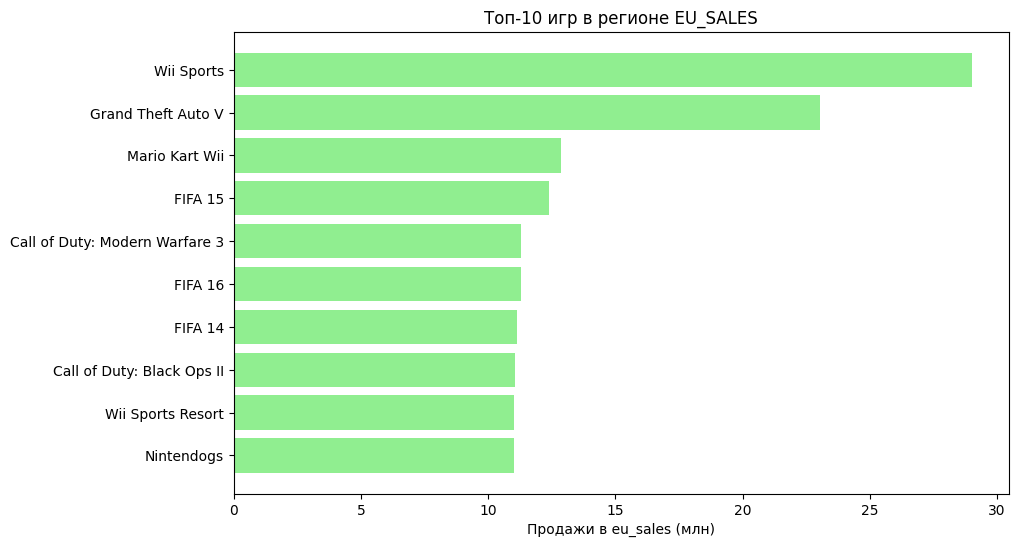

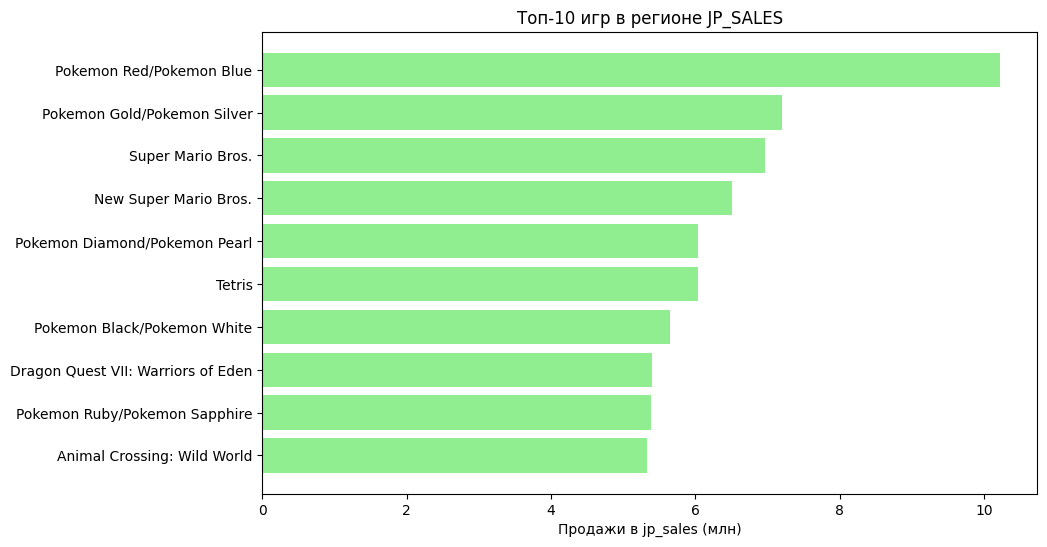

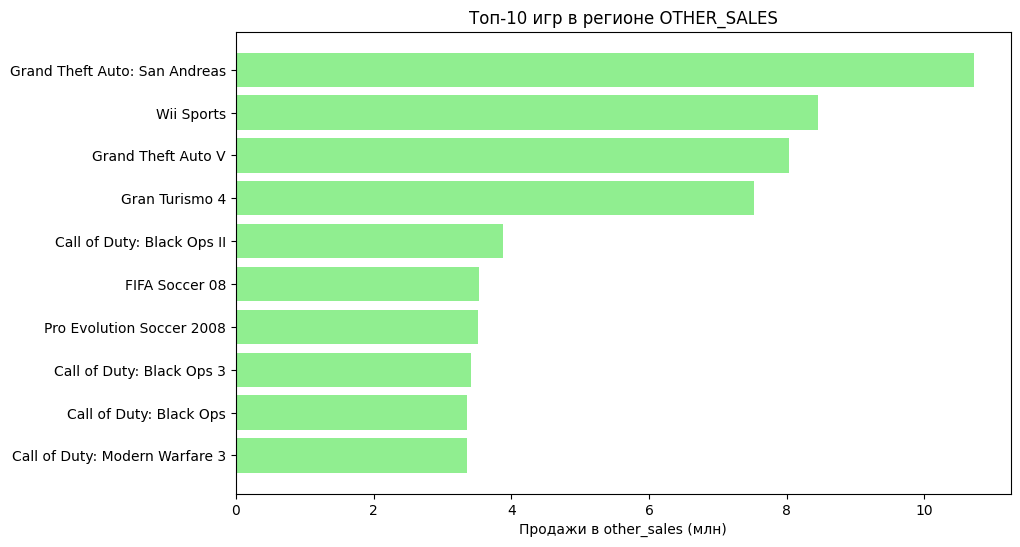

In [22]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    region_sales_grouped = df.groupby('name')[region].sum()
    region_sales_sorted = region_sales_grouped.sort_values(ascending=False)

    region_sales_table = pd.DataFrame({'Игра': region_sales_sorted.index, f'Продажи в {region} (млн)': region_sales_sorted.values})

    plt.figure(figsize=(10, 6))
    plt.barh(region_sales_table['Игра'][:10], region_sales_table[f'Продажи в {region} (млн)'][:10], color='lightgreen')
    plt.xlabel(f'Продажи в {region} (млн)')
    plt.title(f'Топ-10 игр в регионе {region.upper()}')
    plt.gca().invert_yaxis()
    plt.show()

###Самые продаваемы игровые платформы по регионам

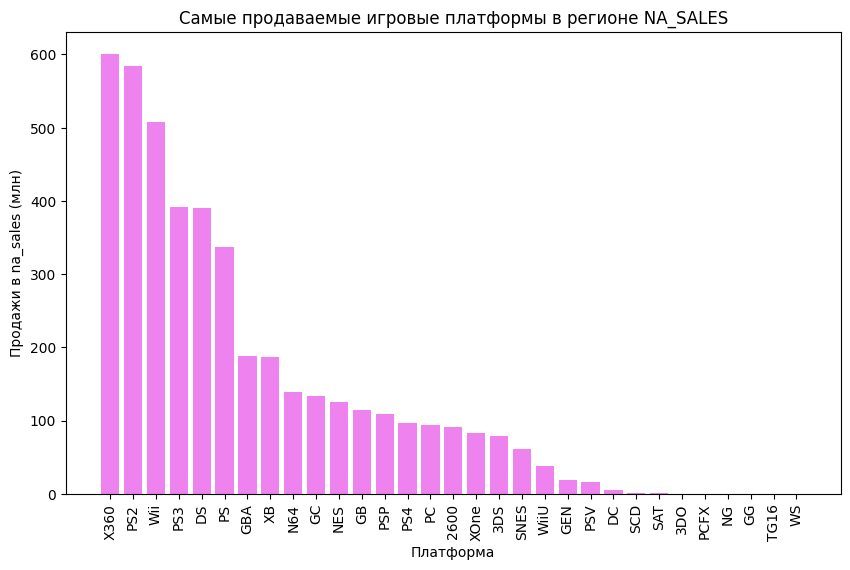

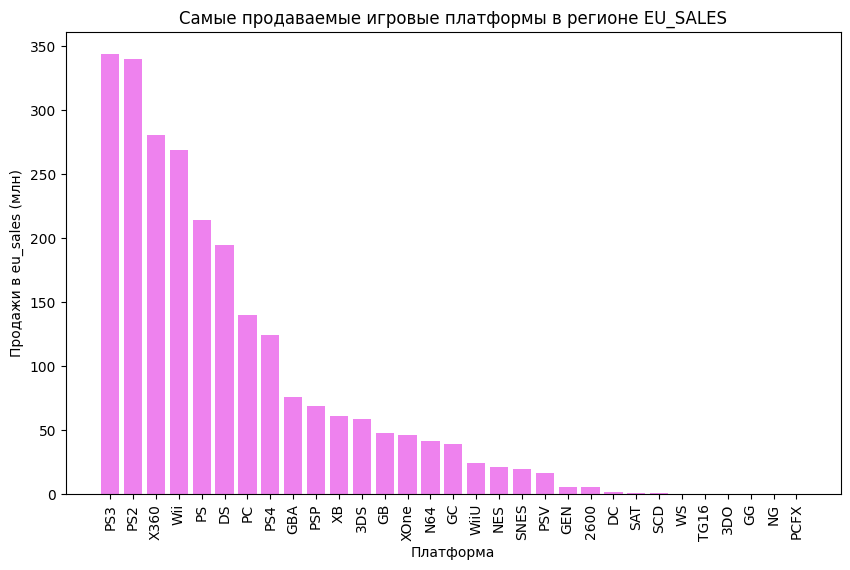

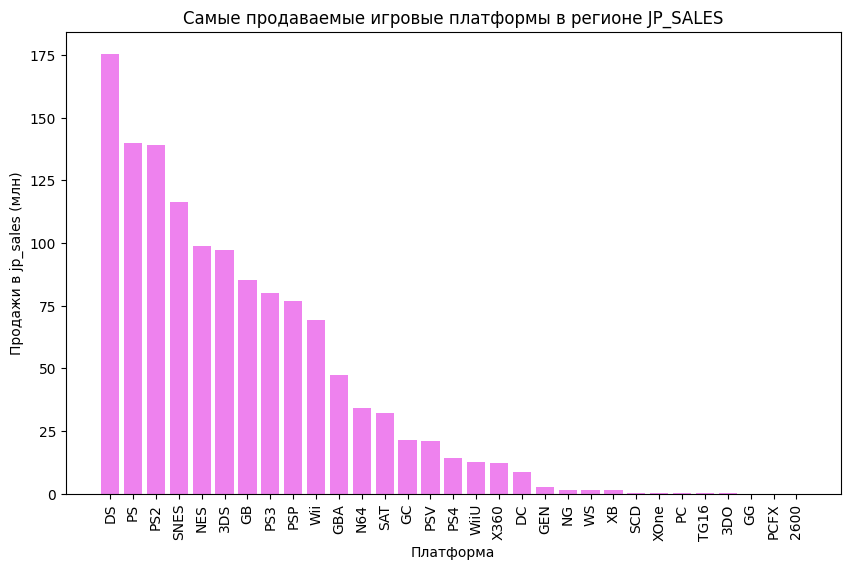

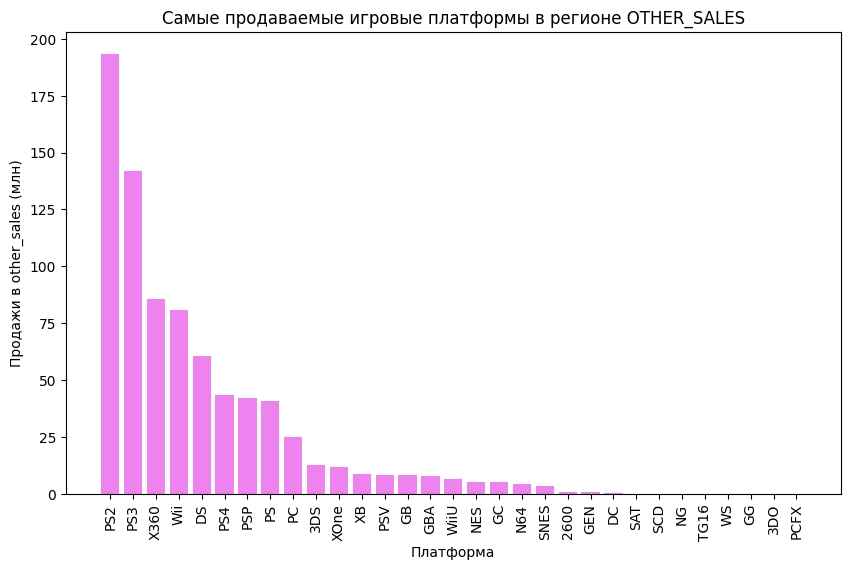

In [23]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    platform_sales = df.groupby('platform')[region].sum()
    platform_sales_sorted = platform_sales.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(platform_sales_sorted.index, platform_sales_sorted.values, color='violet')
    plt.xlabel('Платформа')
    plt.ylabel(f'Продажи в {region} (млн)')
    plt.title(f'Самые продаваемые игровые платформы в регионе {region.upper()}')
    plt.xticks(rotation=90)
    plt.show()

###Популярность игровых жанров по регионам

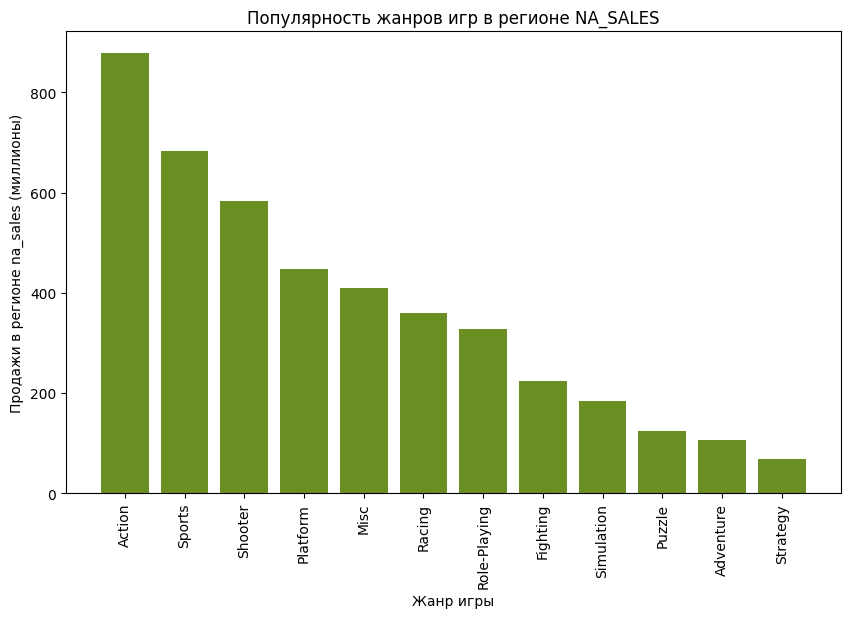

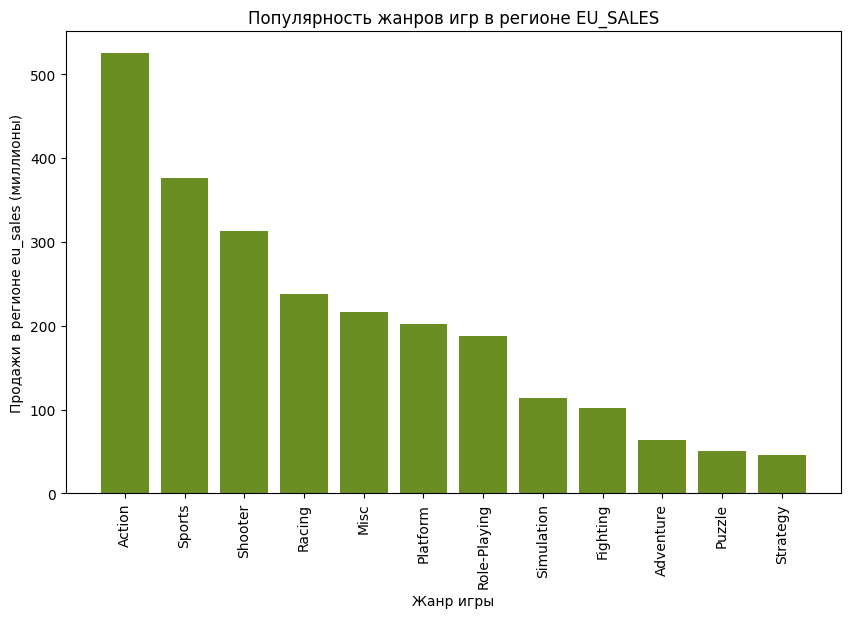

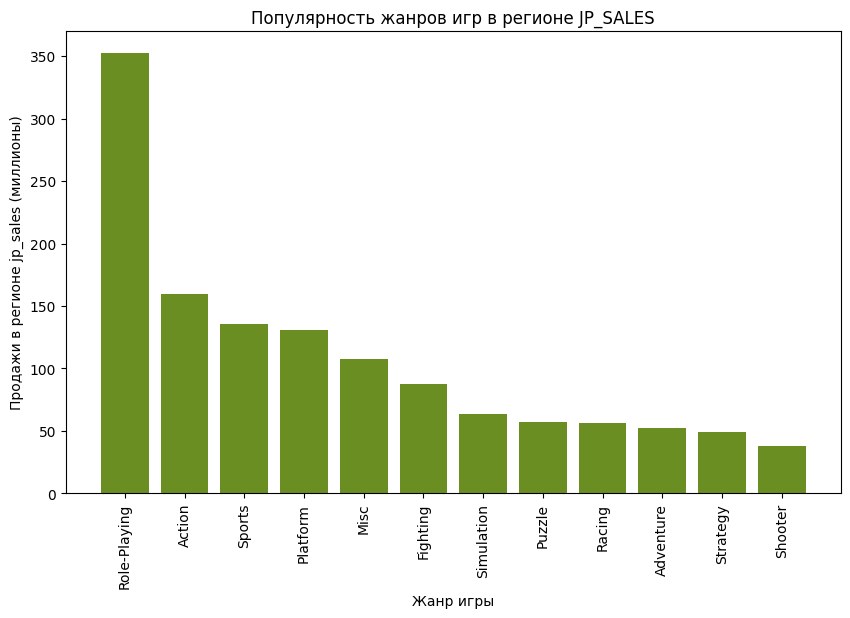

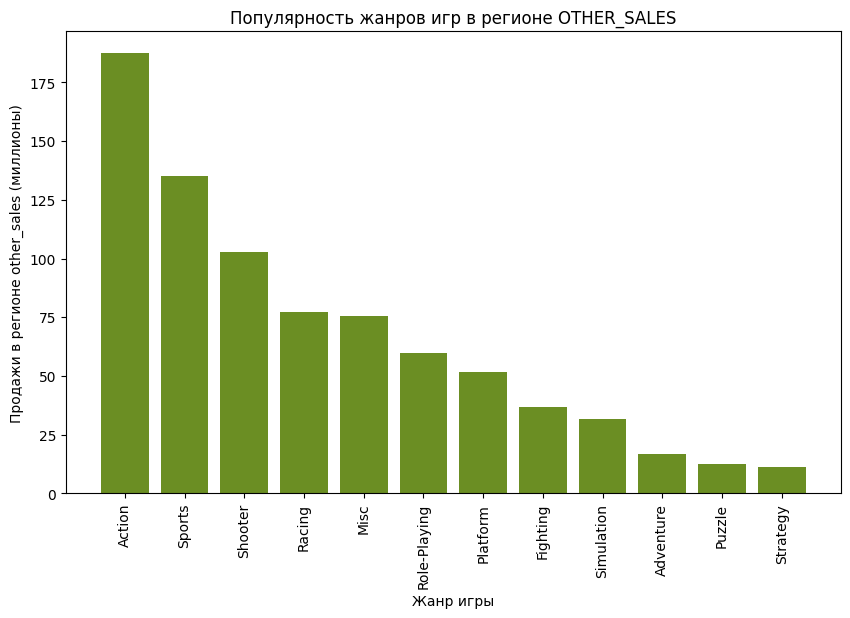

In [24]:
regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
for region in regions:
    region_genre_sales = df.groupby('genre')[region].sum().reset_index()
    region_genre_sales = region_genre_sales.sort_values(by=region, ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(region_genre_sales['genre'], region_genre_sales[region], color='olivedrab')
    plt.xlabel('Жанр игры')
    plt.ylabel(f'Продажи в регионе {region} (миллионы)')
    plt.title(f'Популярность жанров игр в регионе {region.upper()}')
    plt.xticks(rotation=90)
    plt.show()

###Уровень продаж по всем регионам

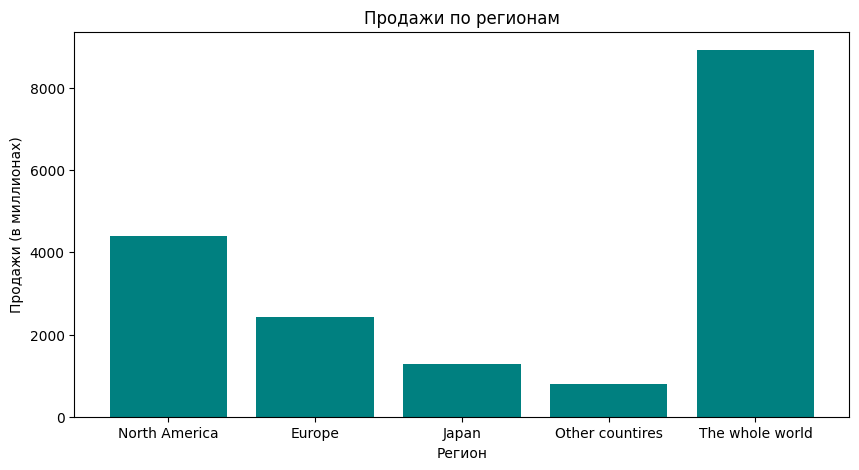

In [25]:
sales_data = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].sum().round()
labels = ['North America', 'Europe', 'Japan', 'Other countires', 'The whole world']
plt.figure(figsize=(10, 5))
plt.bar(labels, sales_data, color='teal')
plt.xlabel('Регион')
plt.ylabel('Продажи (в миллионах)')
plt.title('Продажи по регионам')
plt.show()

##<b>Общий вывод:</b>

- Самые успешные игровые платформы мирового рынка – <b>DS</b> и <b>PS2</b>, с каждой из них приходится <b>13%</b> общих продаж. Эти платформы отмечены как революционные для игровой индустрии в свое время. В то время как <b>PS3, Wii</b> и <b>X360</b> имеют менее выдающиеся результаты с долей в <b>8%</b> каждая.

- Пик продаж приходится на <b>2008-2009</b> годы.

- Популярнейшие жанры в мировой игровой индустрии – <b>Action (20%)</b> и <b>Sports (14%)</b>.

- В мире игрового издательства лидируют <b>Electronic Arts (8%)</b>, за которыми следуют <b>Activision (5%)</b> и <b>Namco (5%)</b>.

- По регионам: <b>Wii Sports</b> лидирует в Северной Америке и Европе, <b>Pokemon Red/Blue</b> – в Японии, а <b>GTA San Andreas</b> – в остальных частях мира.

- По платформам: <b>X360</b> – самая продаваемая в Северной Америке, <b>PS3</b> – в Европе, <b>DS</b> – в Японии, <b>PS2</b> – в остальных частях мира.

- Глобально жанр <b>Action</b> популярен повсюду, кроме Японии, где преобладает жанр <b>RPG</b>.

- <b>Северная Америка</b> занимает более половины (почти <b>50%</b>) мирового объема продаж видеоигр, <b>Европа</b> – около <b>25%</b>, <b>Япония – 15%</b>.